In [206]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%run data_cleaning.ipynb

In [207]:
# load the cleaned_dataset
# runs_df = pd.read_csv('run_data.csv')
runs_df.head()

,name,distance_m,moving_time_s,elapsed_time_s,elevation_change_m,type,date,average_cadence,average_heartrate,max_heartrate,pace_per_mile,distance_mi,id,time_of_day,average_zone,max_zone,ratio_avg_hr_to_max_hr
0,Evening Run,5823,0 days 00:30:25,1828,10.9,Run,2022-12-26,86.7,152.4,167,0 days 00:08:24.143646408,3.62,NaN,evening,3,4,0.912575
1,Morning Run,2650,0 days 00:18:30,1633,-6.6,Run,2022-12-28,73.7,133.0,157,0 days 00:11:12.727272727,1.65,NaN,morning,2,4,0.847134
2,Evening Run,2813,0 days 00:14:56,896,23.2,Run,2023-01-08,86.5,160.9,173,0 days 00:08:32,1.75,NaN,evening,4,5,0.930058
3,Afternoon Run,3382,0 days 00:18:22,1179,18.9,Run,2023-02-04,85.9,141.4,176,0 days 00:08:44.761904761,2.10,NaN,afternoon,3,5,0.803409
4,Afternoon Run,3652,0 days 00:22:35,1357,31.8,Run,2023-02-06,82.7,146.8,166,0 days 00:09:56.916299559,2.27,NaN,afternoon,3,4,0.884337


In [208]:
# view trends in the running zone

print(runs_df.groupby('average_zone').size())
print(runs_df.groupby('max_zone').size())

average_zone
2     2
3    85
4    86
dtype: int64
max_zone
3      7
4    112
5     54
dtype: int64


Only 2 of my tracked runs have averaged out to zone 2 running. There is a relatively even split between zone 3 and zone 4 runs though. The zone corresponding to my max heart rate during runs follows a similar trend with only a few runs falling into zone 3 and most falling into zone 4 or 5.

In [209]:
# number of runs in each zone between the two training programs for the colfax half

training_start_2023 = pd.to_datetime('2023-02-04')
training_end_2023 = pd.to_datetime('2023-05-21')
training_start_2024 = pd.to_datetime('2024-01-21')
training_end_2024 = pd.to_datetime('2024-05-19')

training_runs_2023 = runs_df.loc[(runs_df['date'] >= training_start_2023) & (runs_df['date'] < training_end_2023)]
training_runs_2024 = runs_df.loc[(runs_df['date'] >= training_start_2024) & (runs_df['date'] < training_end_2024)]

print(f'2023 Colfax Half Training:\n{training_runs_2023.groupby("average_zone").size()}\n')
print(f'2024 Colfax Half Training:\n{training_runs_2024.groupby("average_zone").size()}')

2023 Colfax Half Training:
average_zone
3    18
4    21
dtype: int64

2024 Colfax Half Training:
average_zone
3    28
4    20
dtype: int64


~46% of runs during the 2023 training were in zone 3 compared to ~58% of runs during the second training program.

In [210]:
def summary_stats_to_str(df):
    average_pace = format_timedelta(df['pace_per_mile'].mean())
    total_miles = round(df['distance_mi'].sum(), 2)
    total_runs = df.shape[0]
    return f'Total Runs: {total_runs}\nTotal Miles: {total_miles}\nAverage Pace: {average_pace}'

def format_timedelta(dlt):
    minutes, seconds = divmod(int(dlt.total_seconds()), 60)
    return f'{minutes:02}:{seconds:02}'

In [211]:
print('2023 Colfax Half Training:\n' + summary_stats_to_str(training_runs_2023) + '\n')
print('2024 Colfax Half Training:\n' + summary_stats_to_str(training_runs_2024))

2023 Colfax Half Training:
Total Runs: 39
Total Miles: 152.67
Average Pace: 08:34

2024 Colfax Half Training:
Total Runs: 48
Total Miles: 216.37
Average Pace: 08:39


I ran ~30% less miles in the first training program compared to the second, yet maintained a similar pace. I ran 9 more times leading up to the race which was almost a 25% increase.

In [212]:
# number of runs in the month leading up to the race

filter_date_2023 = pd.to_datetime('2023-04-21')
filter_date_2024 = pd.to_datetime('2024-04-19')

final_month_runs_2023 = training_runs_2023.loc[training_runs_2023['date'] >= filter_date_2023]
final_month_runs_2024 = training_runs_2024.loc[training_runs_2024['date'] >= filter_date_2024]

print('2023 Colfax Half Training - Final Month:\n' + summary_stats_to_str(final_month_runs_2023) + '\n')
print('2024 Colfax Half Training - Final Month:\n' + summary_stats_to_str(final_month_runs_2024))


2023 Colfax Half Training - Final Month:
Total Runs: 10
Total Miles: 49.68
Average Pace: 08:31

2024 Colfax Half Training - Final Month:
Total Runs: 12
Total Miles: 57.93
Average Pace: 08:27


In [213]:
current_training_start_date = pd.to_datetime('2024-05-29')
current_training_runs = runs_df.loc[runs_df['date'] >= current_training_start_date]

print('Current Training Plan Runs:\n' + summary_stats_to_str(current_training_runs))
print()
print(current_training_runs.groupby("average_zone").size())

Current Training Plan Runs:
Total Runs: 12
Total Miles: 40.79
Average Pace: 09:04

average_zone
2    1
3    9
4    2
dtype: int64


In [289]:
# grouping running stats by month

runs_df['month_year'] = runs_df['date'].dt.to_period('M')
runs_by_month = (runs_df.groupby('month_year')[['distance_mi', 'name', 'pace_per_mile', 'average_zone']]
                        .agg({'distance_mi': 'sum', 'name': 'size', 'pace_per_mile':'mean', 'average_zone': lambda x: pd.Series.mode(x)[0]})
                        .reset_index()
                        .rename(columns={'name': 'number_of_runs'})
                )
runs_by_month['formatted_pace_per_mile'] = pd.to_datetime(runs_by_month['pace_per_mile'].apply(format_timedelta), format='%M:%S').dt.time
runs_by_month

,month_year,distance_mi,number_of_runs,pace_per_mile,average_zone,formatted_pace_per_mile
0,2022-12,5.27,2,0 days 00:09:48.435459567,2,00:09:48
1,2023-01,1.75,1,0 days 00:08:32,4,00:08:32
2,2023-02,32.88,13,0 days 00:08:55.163045765,4,00:08:55
3,2023-03,26.06,7,0 days 00:08:24.321166731,3,00:08:24
4,2023-04,67.35,13,0 days 00:08:18.978842749,4,00:08:18
5,2023-05,50.54,10,0 days 00:08:20.213384713,4,00:08:20
6,2023-06,25.79,9,0 days 00:08:41.311536774,4,00:08:41
7,2023-07,48.44,14,0 days 00:08:44.133660251,4,00:08:44
8,2023-08,53.81,12,0 days 00:08:06.538107280,3,00:08:06
9,2023-09,51.51,8,0 days 00:08:14.978643599,4,00:08:14


/var/folders/6_/k3rv9s6j2tl0kgsbm11nr55w0000gp/T/ipykernel_72460/2542118572.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)


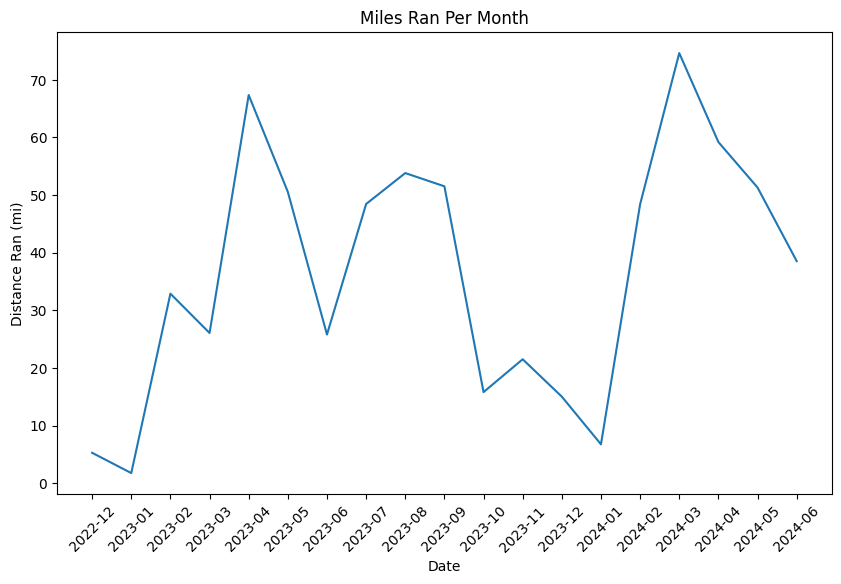

In [215]:
# visualizing miles and total runs

plt.figure(figsize=(10,6))
ax = sns.lineplot(x=runs_by_month['month_year'].astype(str), y=runs_by_month['distance_mi'])
ax.set_title('Miles Ran Per Month')
ax.set_xlabel('Date')
ax.set_ylabel('Distance Ran (mi)')
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)

plt.show()

/var/folders/6_/k3rv9s6j2tl0kgsbm11nr55w0000gp/T/ipykernel_72460/2561309337.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)


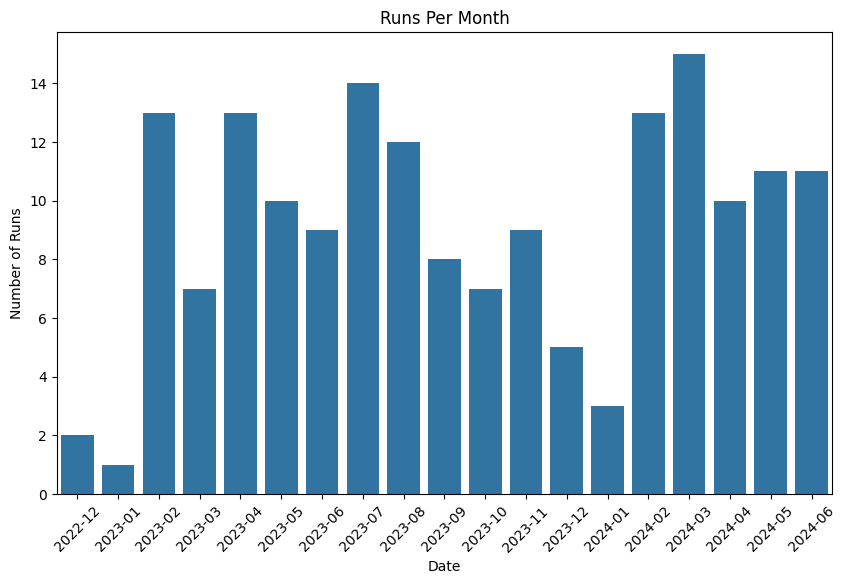

In [250]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=runs_by_month['month_year'].astype(str), y=runs_by_month['number_of_runs'])
ax.set_title('Runs Per Month')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Runs')
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)

plt.show()

/var/folders/6_/k3rv9s6j2tl0kgsbm11nr55w0000gp/T/ipykernel_72460/4194404085.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=45)


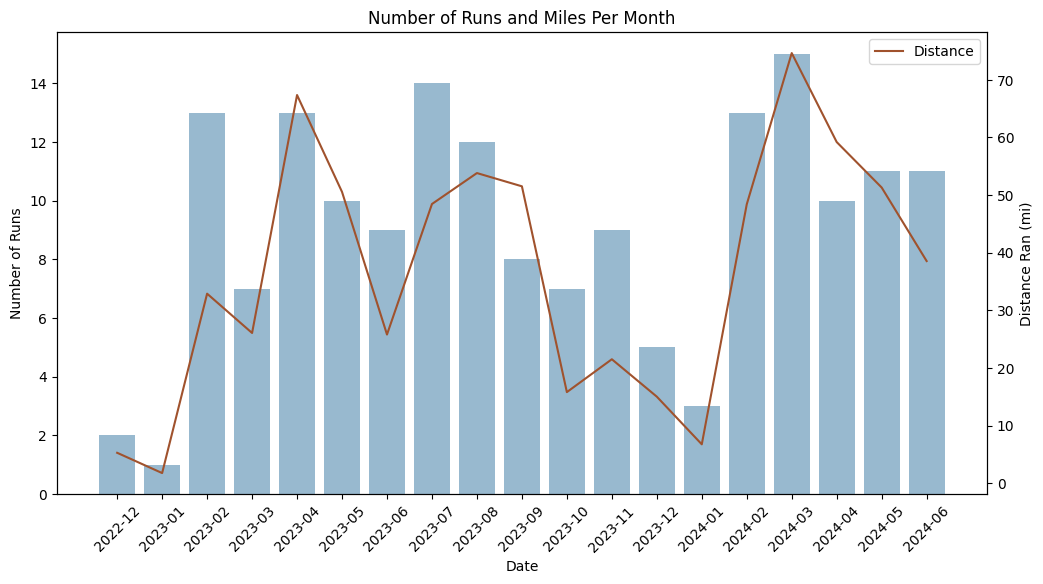

In [251]:
def plot_run_features_by_month(y1, y2, line_label, title, y1_label, y2_label):
    fig, ax1 = plt.subplots(figsize=(12,6))
    
    sns.barplot(x=runs_by_month['month_year'].astype(str), y=y1, alpha=.5, ax=ax1)
    ax2 = ax1.twinx()
    sns.lineplot(x=runs_by_month['month_year'].astype(str), y=y2, color='sienna', label=line_label, ax=ax2)
    
    ax1.set_title(title)
    ax1.set_xlabel('Date')
    ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=45)
    ax1.set_ylabel(y1_label)
    ax2.set_ylabel(y2_label)
    
    plt.show()

plot_run_features_by_month(runs_by_month['number_of_runs'], runs_by_month['distance_mi'], 'Distance', 'Number of Runs and Miles Per Month', 'Number of Runs', 'Distance Ran (mi)')

/var/folders/6_/k3rv9s6j2tl0kgsbm11nr55w0000gp/T/ipykernel_72460/1259245567.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=45)


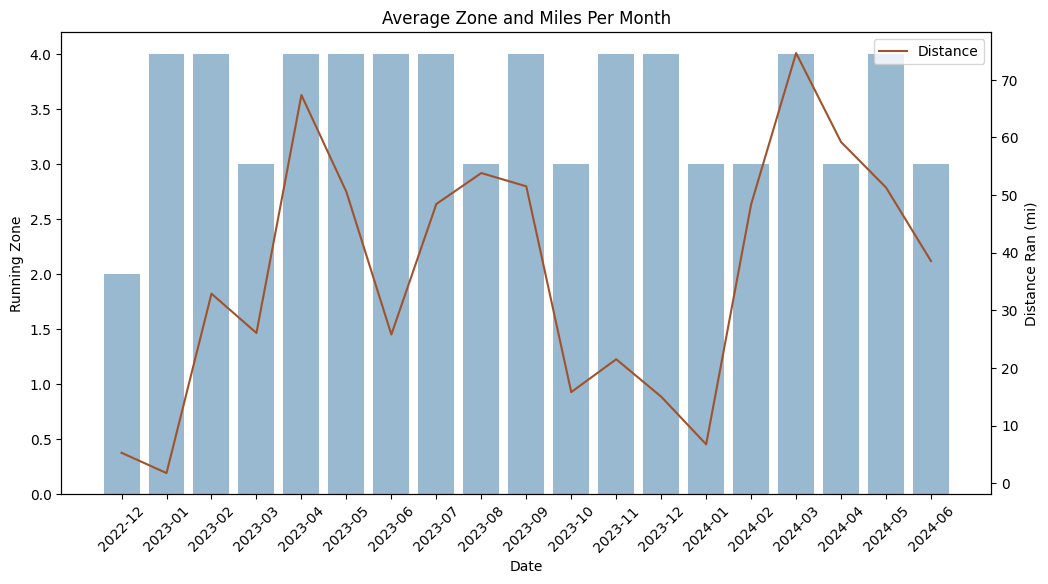

In [218]:
plot_run_features_by_month(runs_by_month['average_zone'], runs_by_month['distance_mi'], 'Distance', 'Average Zone and Miles Per Month', 'Running Zone', 'Distance Ran (mi)')

/var/folders/6_/k3rv9s6j2tl0kgsbm11nr55w0000gp/T/ipykernel_72460/4194404085.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=45)


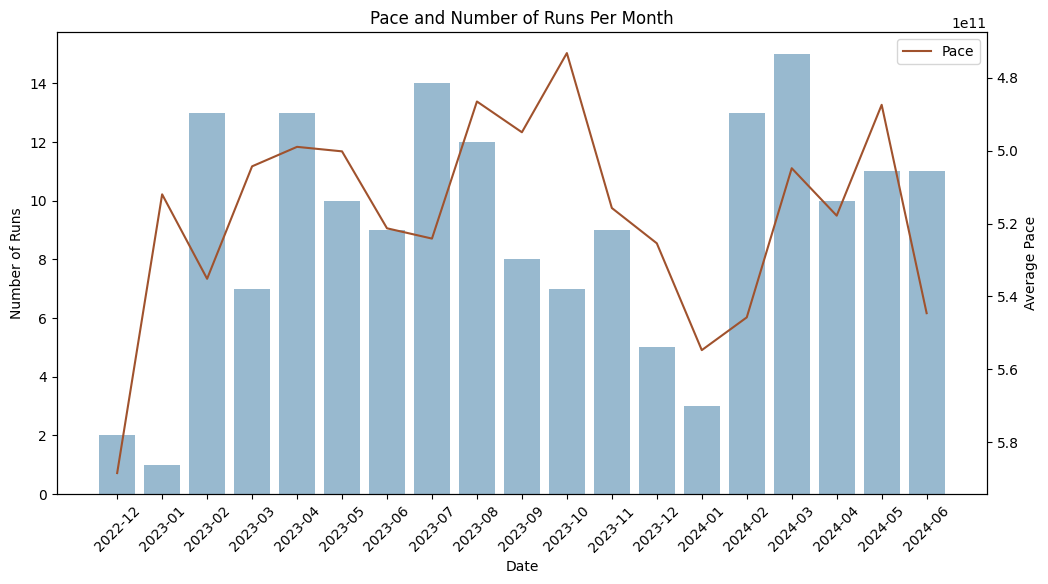

In [252]:
plot_run_features_by_month(runs_by_month['number_of_runs'], runs_by_month['pace_per_mile'], 'Pace', 'Pace and Number of Runs Per Month', 'Number of Runs', 'Average Pace')

There seems to be a bit of a lag on the increase or dropoff in pace as the number of runs increases or decreases over the months.

In [253]:
# look at pace and distance for months with more and less runs than average

average_runs_per_month = runs_df.shape[0] / len(pd.unique(runs_df['month_year']))
months_above_average_runs = runs_by_month.loc[runs_by_month['number_of_runs'] > average_runs_per_month]
months_below_average_runs = runs_by_month.loc[runs_by_month['number_of_runs'] < average_runs_per_month]

months_above_average_runs.describe()

,distance_mi,number_of_runs,pace_per_mile,average_zone
count,10.000000,10.000000,10,10.000000
mean,52.507000,12.200000,0 days 00:08:34.549565998,3.600000
std,12.361294,1.686548,0 days 00:00:22.271313262,0.516398
min,32.880000,10.000000,0 days 00:08:06.538107280,3.000000
25%,48.402500,11.000000,0 days 00:08:19.287478240,3.000000
50%,50.920000,12.500000,0 days 00:08:31.342969029,4.000000
75%,57.845000,13.000000,0 days 00:08:52.405699386,4.000000
max,74.630000,15.000000,0 days 00:09:05.739247131,4.000000


In [254]:
months_below_average_runs.describe()

,distance_mi,number_of_runs,pace_per_mile,average_zone
count,9.000000,9.000000,9,9.000000
mean,18.825556,5.666667,0 days 00:08:41.134692159,3.444444
std,15.088767,3.041381,0 days 00:00:33.628787200,0.726483
min,1.750000,1.000000,0 days 00:07:53.263546297,2.000000
25%,6.740000,3.000000,0 days 00:08:24.321166731,3.000000
50%,15.800000,7.000000,0 days 00:08:35.746041238,4.000000
75%,25.790000,8.000000,0 days 00:08:45.430627758,4.000000
max,51.510000,9.000000,0 days 00:09:48.435459567,4.000000


For months where I run less than average, I see a very large dropoff in the my average miles ran. My the average number of runs is halfed compared to months I run more than average, however the number of miles drops off by a factor of almost 3. Average pace and average running zone is relatively consistent between the two groups.

In [256]:
print('Above average running months:')
print(f'\tAverage number of runs: {months_above_average_runs["number_of_runs"].mean():.1f}')
print(f'\tAverage miles per month: {months_above_average_runs["distance_mi"].mean():.2f}')
print(f'\tMost frequent running zone: {months_above_average_runs["average_zone"].mode()[0]}\n')

print('Below average running months:')
print(f'\tAverage number of runs: {months_below_average_runs["number_of_runs"].mean():.1f}')
print(f'\tAverage miles per month: {months_below_average_runs["distance_mi"].mean():.2f}')
print(f'\tMost frequent running zone: {months_below_average_runs["average_zone"].mode()[0]}\n')

Above average running months:
	Average number of runs: 12.2
	Average miles per month: 52.51
	Most frequent running zone: 4

Below average running months:
	Average number of runs: 5.7
	Average miles per month: 18.83
	Most frequent running zone: 4



In [290]:
runs_by_time_of_day = (runs_df.groupby('time_of_day')[['distance_mi', 'name', 'pace_per_mile', 'average_zone']]
                        .agg({'distance_mi': 'sum', 'name': 'size', 'pace_per_mile':'mean', 'average_zone': lambda x: pd.Series.mode(x)[0]})
                        .reset_index()
                        .rename(columns={'name': 'number_of_runs'})
                )
runs_by_time_of_day['formatted_pace_per_mile'] = pd.to_datetime(runs_by_time_of_day['pace_per_mile'].apply(format_timedelta), format='%M:%S').dt.time
runs_by_time_of_day

/var/folders/6_/k3rv9s6j2tl0kgsbm11nr55w0000gp/T/ipykernel_72460/1833084247.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runs_by_time_of_day = (runs_df.groupby('time_of_day')[['distance_mi', 'name', 'pace_per_mile', 'average_zone']]


,time_of_day,distance_mi,number_of_runs,pace_per_mile,average_zone,formatted_pace_per_mile
0,afternoon,153.69,35,0 days 00:08:25.935977579,3,00:08:25
1,evening,299.88,88,0 days 00:08:41.490641392,3,00:08:41
2,morning,223.65,42,0 days 00:08:20.315285690,4,00:08:20
3,night,17.28,8,0 days 00:09:00.613346363,3,00:09:00


In [291]:
runs_by_time_of_day['miles_per_run'] = runs_by_time_of_day['distance_mi'] / runs_by_time_of_day['number_of_runs']
runs_by_time_of_day

,time_of_day,distance_mi,number_of_runs,pace_per_mile,average_zone,formatted_pace_per_mile,miles_per_run
0,afternoon,153.69,35,0 days 00:08:25.935977579,3,00:08:25,4.391143
1,evening,299.88,88,0 days 00:08:41.490641392,3,00:08:41,3.407727
2,morning,223.65,42,0 days 00:08:20.315285690,4,00:08:20,5.325000
3,night,17.28,8,0 days 00:09:00.613346363,3,00:09:00,2.160000


Night runs seem to be the worst for me, however I do not regularly run at those times. A large majority of the runs comes during the evening, however I appear to do better running in the morning and afternoon runs. I average more miles per run and do them at a faster pace. This would make sense as my morning and afternoon runs generally occur on the weekends and the evening runs are more likely on weekdays where I do a run after a day of work.

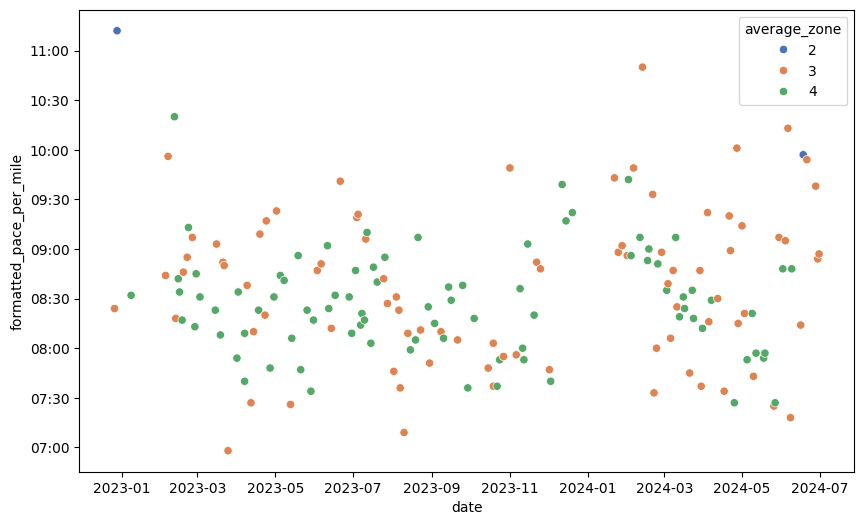

In [305]:
# plotting pace over time for the different average_zones
import matplotlib.dates as mdates
runs_df['formatted_pace_per_mile'] = pd.to_datetime(runs_df['pace_per_mile'].apply(format_timedelta), format='%M:%S')

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(x=runs_df['date'], y=runs_df['formatted_pace_per_mile'], hue=runs_df['average_zone'], palette='deep')
ax.yaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))

plt.show()